TELECOM COMPANY CHURN ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

Load the dataset

In [2]:
telco_base_data = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

In [3]:
telco_base_data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
telco_base_data.shape

(7043, 21)

In [5]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Checking the datatypes of all columns
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Statistical description of numeric variables
telco_base_data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

<Axes: xlabel='Churn', ylabel='count'>

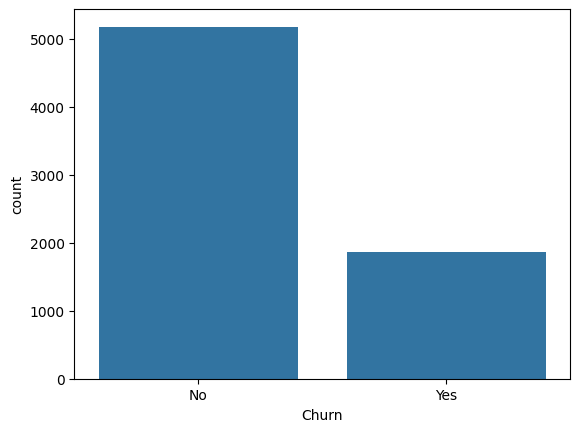

In [8]:
sns.countplot(x = "Churn", data = telco_base_data)

In [9]:
# Checking for the null values
telco_base_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are no missing values as per above code

DATA CLEANING

1.Create a copy of data for manipulation and processing

In [11]:
telco_data = telco_base_data.copy()

2.Total CHarges should be interms of numeric, so convert it to numerical datatype

In [12]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors = 'coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see there are 11 missing values in the column of TotalCharges.

In [13]:
telco_data.loc[telco_data['TotalCharges'].isnull() == True]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

4. Treating the Missing Value

Since there are only 0.15% records which are missing, so it is safer to ignore them from further processing

In [14]:
# Removing Missing Values
telco_data.dropna(how = 'any', inplace = True)

5.Divide customers into bins based on tenure

In [15]:
# Getting the value of Maximum tenure
print(telco_data['tenure'].max())

72


In [16]:
# Group the tenure in bins for 12 months
labels = []
for i in range(1, 72, 12):
    labels.append("{} - {}".format(i, i + 11))
telco_data['tenure_group'] = pd.cut(telco_data['tenure'], bins=range(1, 80, 12), right=False, labels=labels)

In [17]:
telco_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

6. Remove Columns which are not required for processing

In [18]:
# Drop column customerID and tenure
telco_data.drop(columns = ['customerID', 'tenure'], axis=1, inplace=True)
telco_data.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn tenure_group  
0           Electronic check           29.85         29.85    No       1 - 12  
1               Mailed check           56.95       1889.50    No      25 - 36  
2               Mailed check           53.85        108.15   Yes       1 - 12  
3  Bank transfer (automatic)           42.30       1840.75    No      37 - 48  
4           Electronic check           70.70        151.65   Yes       1 - 12

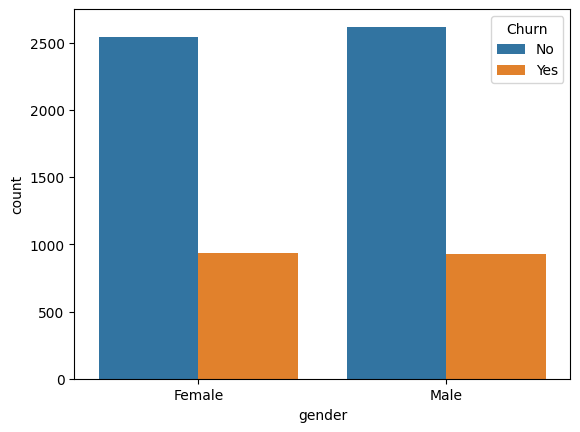

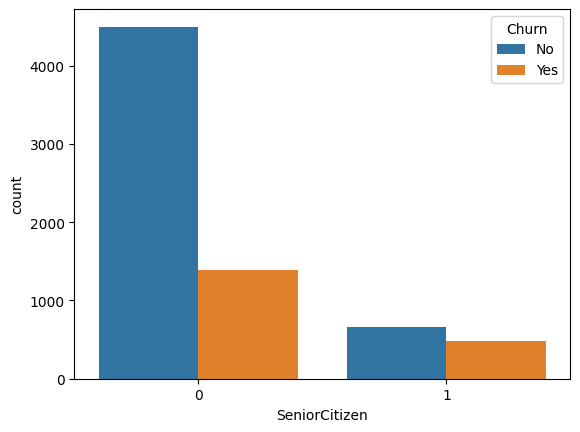

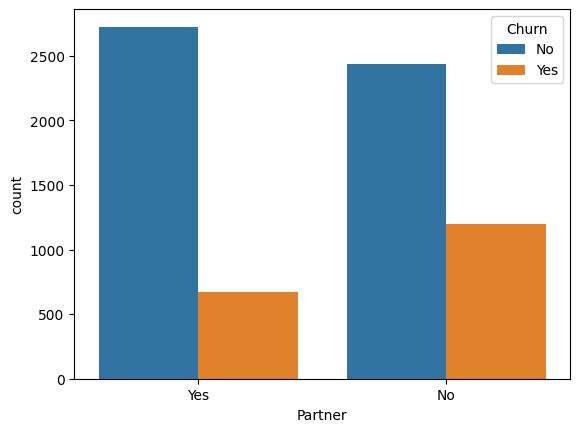

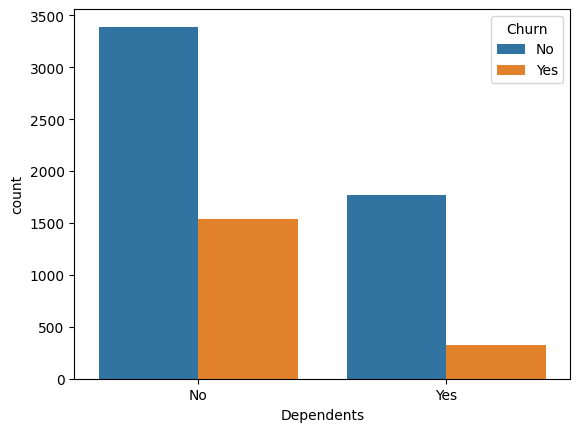

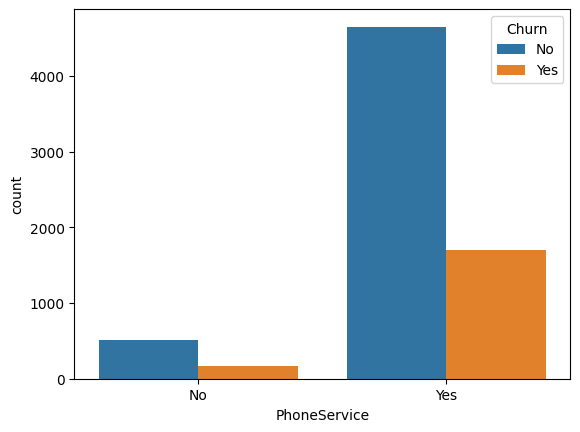

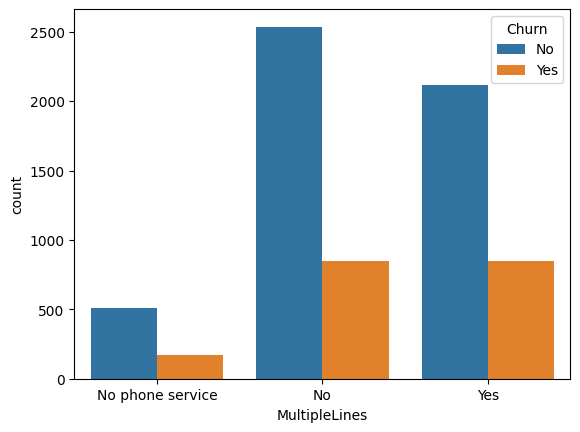

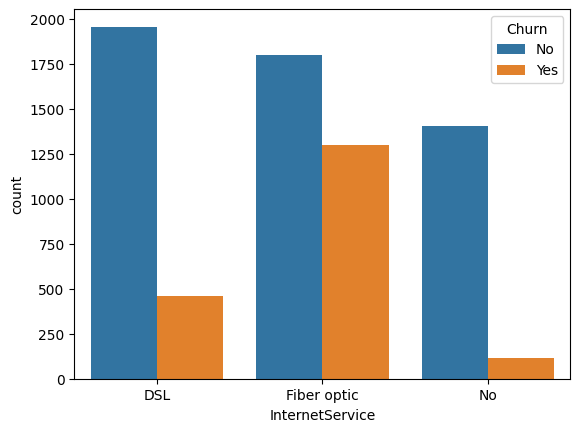

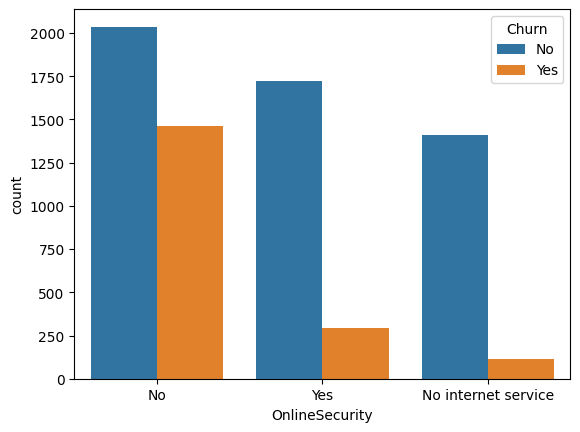

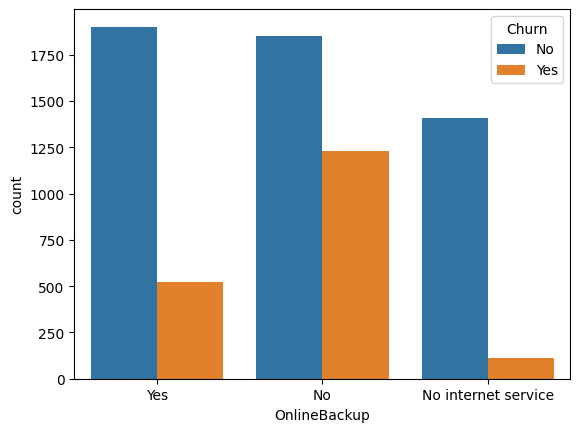

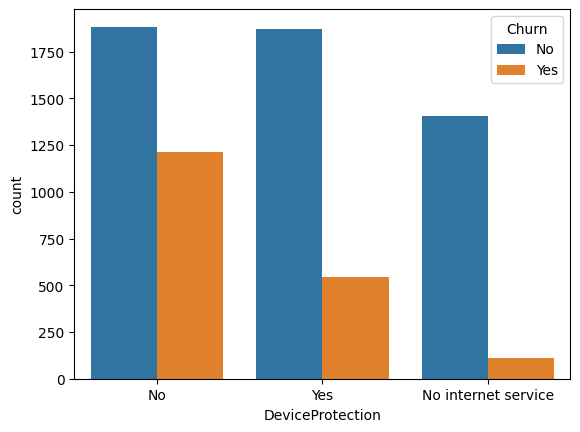

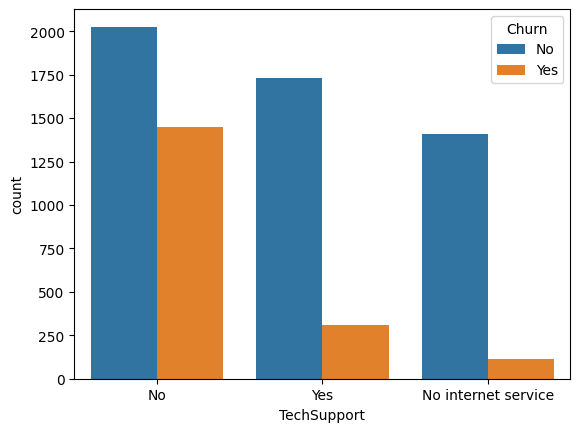

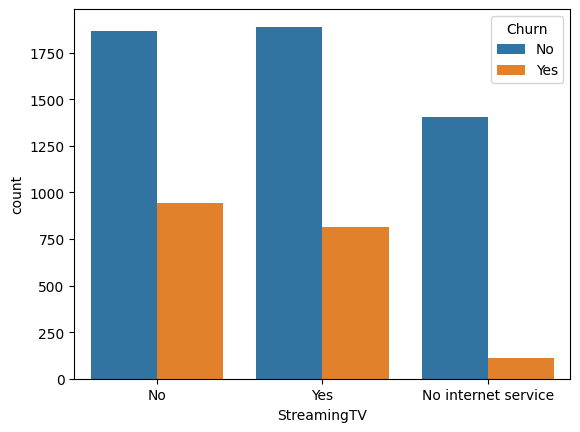

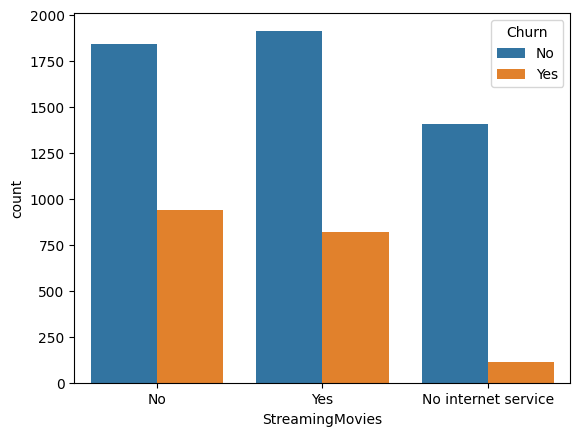

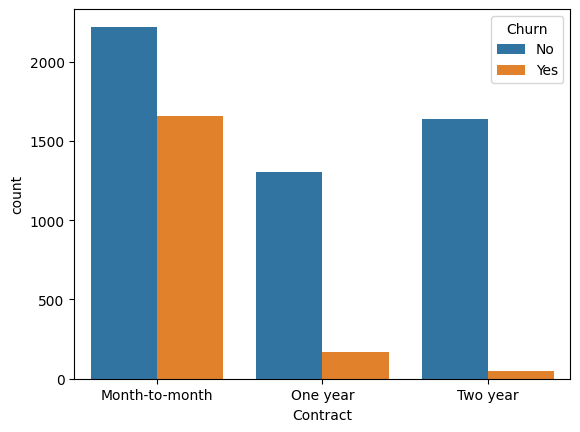

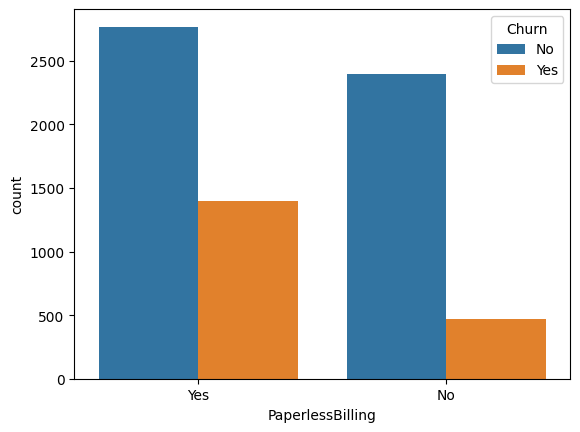

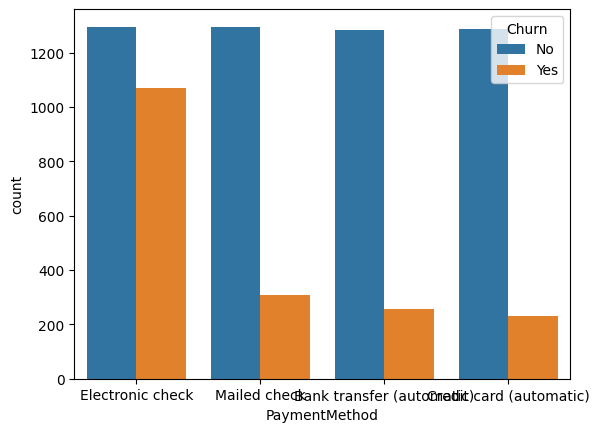

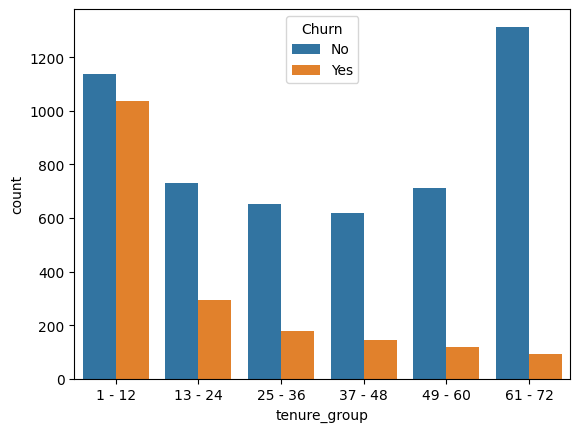

In [19]:
# Dropping the specific columns to get predictor
predictors = telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])
for predictor in predictors.columns:
    plt.figure()
    # Creating a countplot for the predictor with the "Churn" as hue
    sns.countplot(x = predictor, hue = 'Churn', data = telco_data)

3. Convert all the categorical variables into dummy variables

In [20]:
# Importing library for One Hot Encoder to convert categorical columns to numerical
from sklearn.preprocessing import OneHotEncoder


In [21]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

In [22]:
telco_data.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn tenure_group  
0           Electronic check           29.85         29.85    No       1 - 12  
1               Mailed check           56.95       1889.50    No      25 - 36  
2               Mailed check           53.85        108.15   Yes       1 - 12  
3  Bank transfer (automatic)           42.30       1840.75    No      37 - 48  
4           Electronic check           70.70        151.65   Yes       1 - 12

In [23]:
Cat_col = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']
#Apply OHE to the catgoricak columns
encoded_cols = ohe.fit_transform(telco_data[Cat_col])
# Creating a dataframe with the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names_out(Cat_col))
#Droping the categorical columns
telco_data = telco_data.drop(columns=Cat_col)
# Concatinating the original dataset with the encoded dataset
telco_data = pd.concat([telco_data, encoded_df], axis=1)

Convert the target variable "Churn" in a binary numeric variable

In [24]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [25]:
telco_data.head()

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0           29.85         29.85      0            1.0   
1              0           56.95       1889.50      0            0.0   
2              0           53.85        108.15      1            0.0   
3              0           42.30       1840.75      0            0.0   
4              0           70.70        151.65      1            1.0   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0          0.0         0.0          1.0            1.0             0.0  ...   
1          1.0         1.0          0.0            1.0             0.0  ...   
2          1.0         1.0          0.0            1.0             0.0  ...   
3          1.0         1.0          0.0            1.0             0.0  ...   
4          0.0         1.0          0.0            1.0             0.0  ...   

   PaymentMethod_Bank transfer (automatic)  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      1.0   
4                                      0.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             1.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             1.0   

   PaymentMethod_Mailed check  tenure_group_1 - 12  tenure_group_13 - 24  \
0                         0.0                  1.0                   0.0   
1                         1.0                  0.0                   0.0   
2                         1.0                  1.0                   0.0   
3                         0.0                  0.0                   0.0   
4                         0.0                  1.0                   0.0   

   tenure_group_25 - 36  tenure_group_37 - 48  tenure_group_49 - 60  \
0                   0.0                   0.0                   0.0   
1                   1.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   1.0                   0.0   
4                   0.0                   0.0                   0.0   

   tenure_group_61 - 72  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 51 columns]

<Axes: >

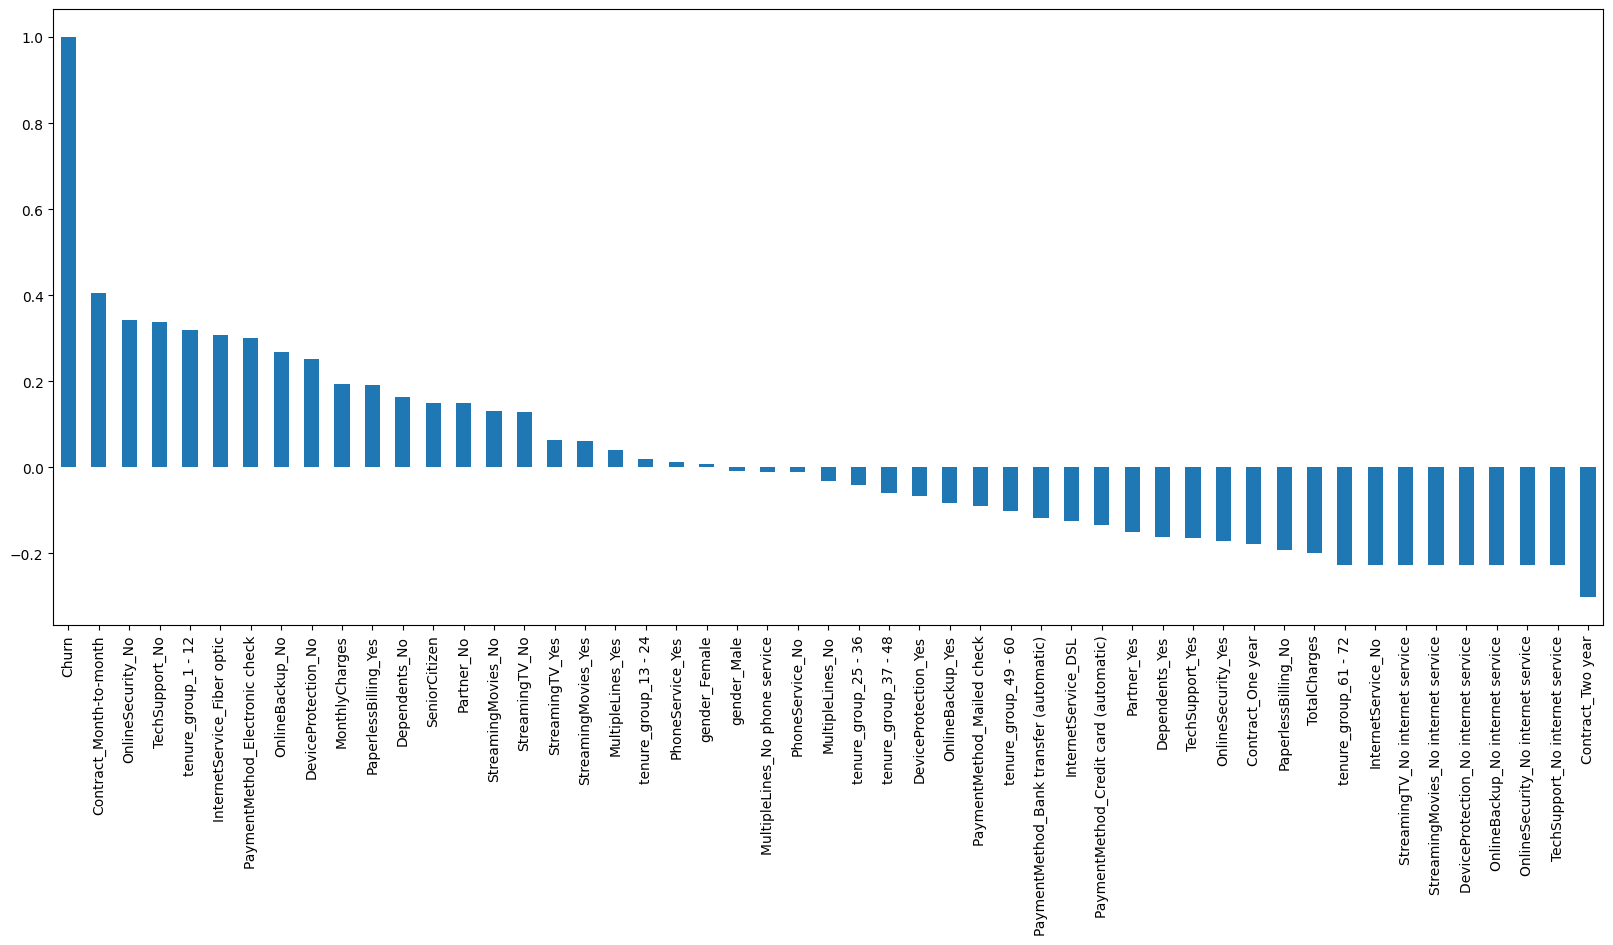

In [26]:
plt.figure(figsize=(20,8))
telco_data.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

Derived Insight from the above plot

HIGH Churn is seen in case of MONTH-TO-MONTH contracts, NO ONLINE SECURITY, NO TECH SUPPORT, FIRST YEAR OF SUBSCRIPTION AND FIBRE OPTICS INTERNET.

LOW Churn is seen in case of MULTIPLE YEAR CONTRACTS, SUBSCRIPTIONS WITHOUT INTERNET SERVICE AND THE CUSTOMERS ENGAGED FOR 5+ YEARS

Factors like GENDER, AVAILABILTIY OF PHONE SERVICE AND MULTIPLE LINES have no impact on Churn

CONCLUSION

These are some of the quick insights from this code:

 1. The People who make payments using Electronic check are the highest churners.
 2. Month-To-Month Contract type customers are more likely to churn as there is no contract they are free to go.
 3. Customers who have no Online Security, no Tech Support are high churners.
 4. Non Senior Citizens are most likely to churn.
 5. People who don't have their partners are more likely to churn(don't know what's the logic behind it).
 6. People who don't stream movies or tv are high churners.

In [28]:
telco_data.to_csv('tel_churn.csv')